## Métricas Regresión Lineal


---

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

#  Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#  Crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Para evitar que salgan los warnings en jupyter
import warnings
warnings.filterwarnings('ignore')

# librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../files/endesarrollo_map.csv", index_col = 0)
df.sample(5)


,continente_map,life_expectancy,adult_mortality,infant_deaths,alcohol,bmi,diphtheria,hiv_aids,gdp,income_composition_of_resources,schooling
1259,1,72.2,-0.18125,-0.111111,-0.519069,0.629763,0.363636,0.000000,2.248712,0.477809,0.973684
268,4,64.5,-0.87500,0.296296,-0.051511,0.284687,-0.090909,0.071429,-0.121756,-0.032106,0.710526
209,6,70.0,0.08750,-0.185185,0.782566,-0.854062,0.227273,0.071429,0.982924,0.300283,0.289474
77,6,74.0,-0.06250,-0.185185,0.907380,0.135155,0.363636,0.000000,2.260469,-2.362606,-3.078947
763,1,57.2,1.03125,7.074074,-0.279346,-0.592380,-2.000000,2.285714,-0.329538,-1.055713,-1.342105


En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones.

 Los objetivo de este pairprogramming son:


`Separamos los datos entre x= variables predictoras e Y= variable respuesta`

In [3]:
X = df.drop("life_expectancy", axis = 1)
y = df["life_expectancy"]

`Creamos los datos de train y test en este caso 80% para train y 20% para test.`

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

Ajustar vuestro modelo.

In [5]:
lr = LinearRegression(n_jobs=-1) #Iniciamos regresion lineal


In [6]:
lr.fit(x_train, y_train) #aplicamos el metodo fit

LinearRegression(n_jobs=-1)

In [7]:
#Aplicamos el metodo predict
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [8]:
# Generamos los dataframes correspondientes
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})


In [9]:
#Unimos los df de test y train y vemos su contenido.
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.sample(4)

,Real,Predicted,Set
320,77.7,75.034436,Train
1692,77.3,73.927973,Train
1137,51.9,50.826203,Test
453,49.2,52.024054,Test


In [10]:
#Calculamos los resultados y los agregamos al df
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.sample(10)

,Real,Predicted,Set,residuos
2322,73.0,67.294131,Train,5.705869
384,73.3,69.181079,Test,4.118921
1243,56.7,60.532556,Train,-3.832556
1696,76.6,75.418761,Train,1.181239
669,74.4,72.065453,Train,2.334547
310,73.6,73.141426,Train,0.458574
1639,74.0,70.659939,Test,3.340061
1015,68.1,68.797673,Train,-0.697673
723,64.4,59.657477,Train,4.742523
1887,72.3,68.520263,Train,3.779737


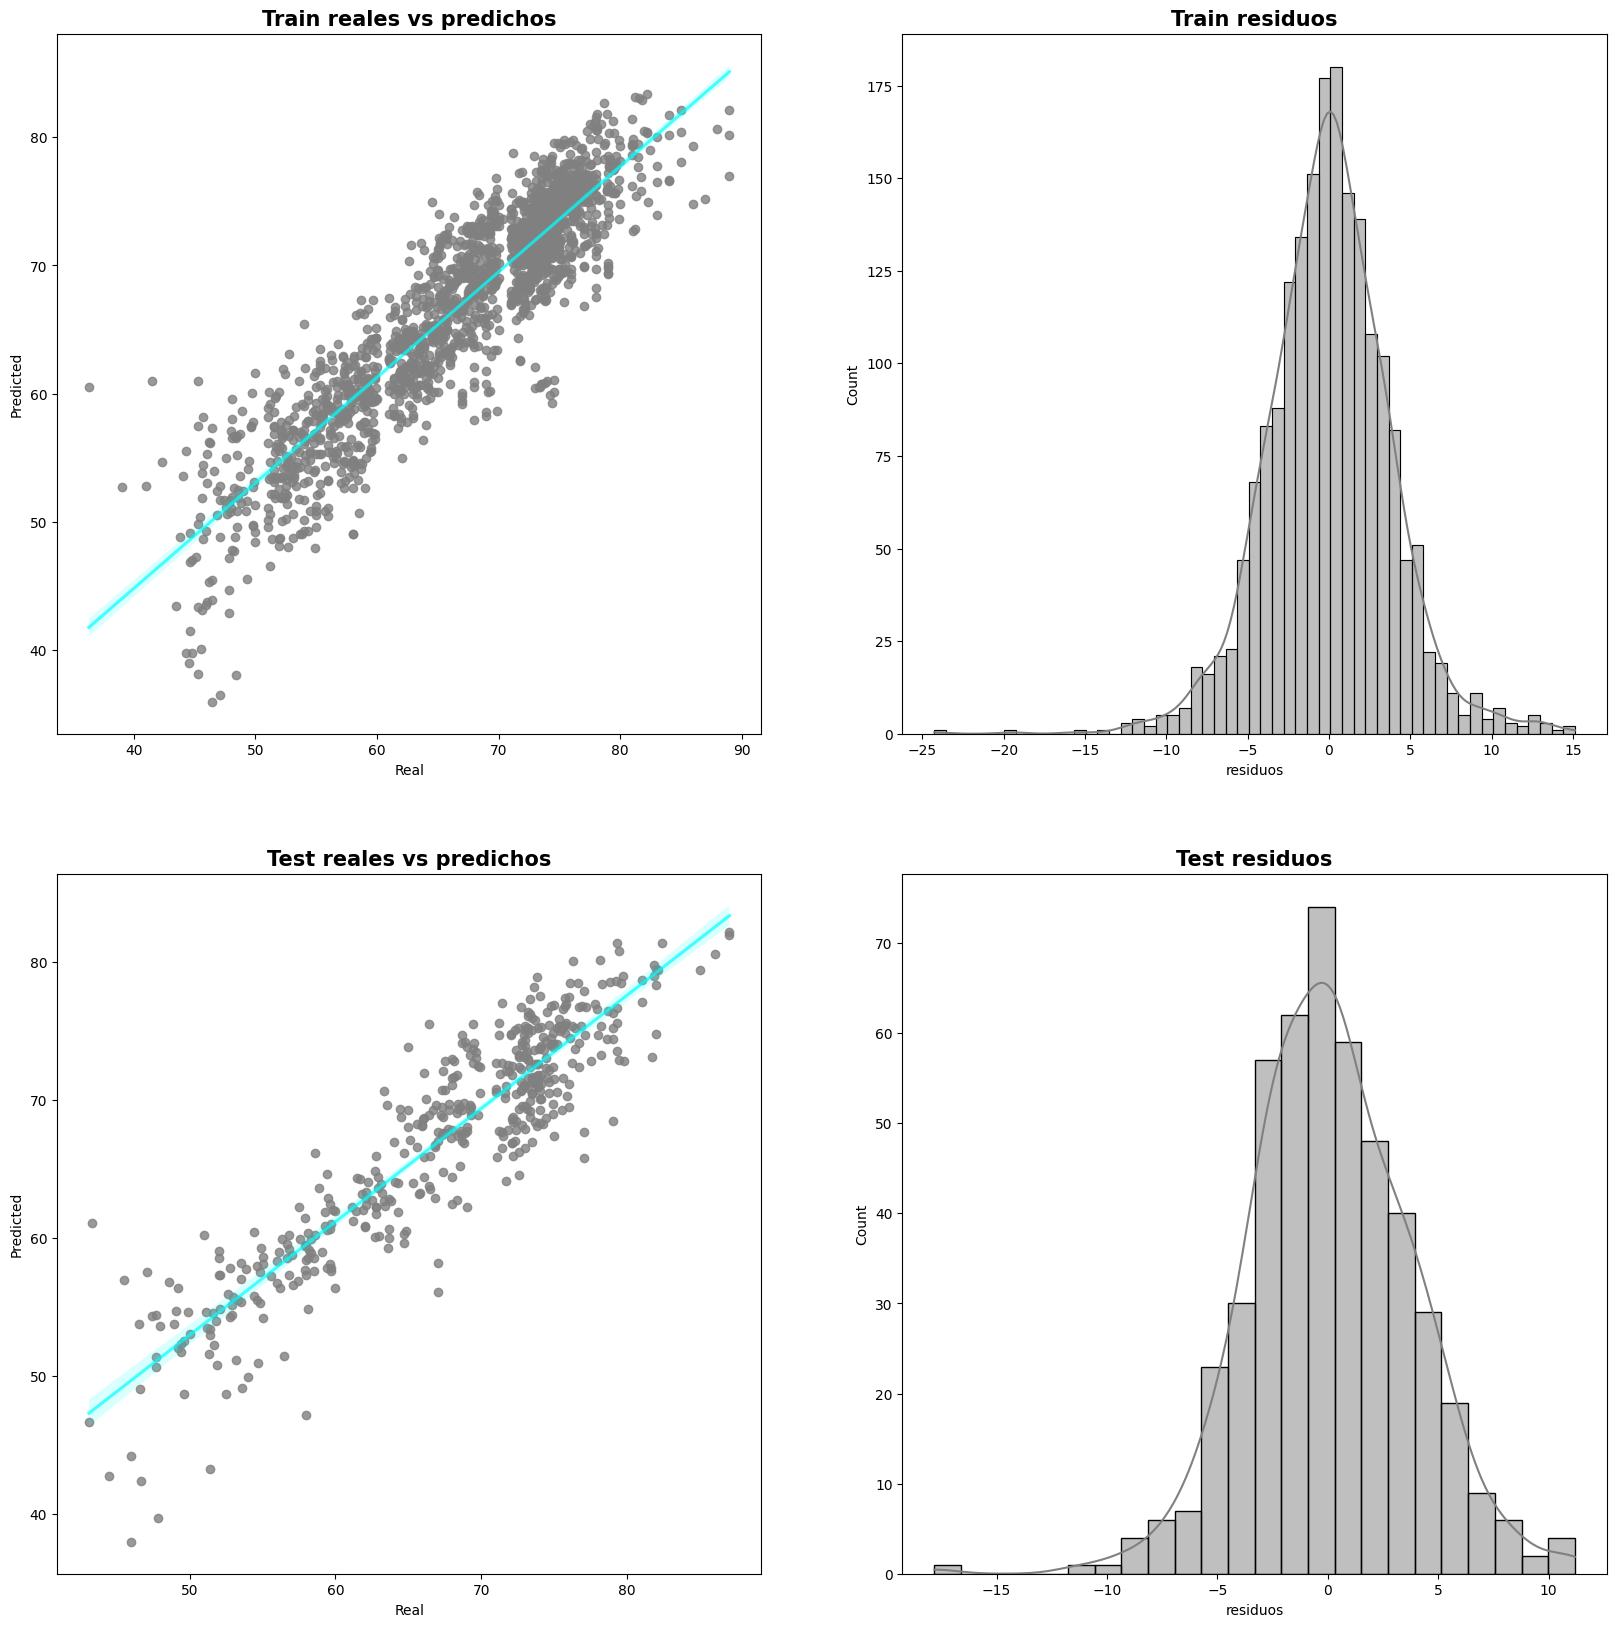

In [11]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "aqua", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "aqua", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True,
             line_kws= {"color": "aqua"},
             ax = ax[0,1])

 

sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

---

1. Calculéis las métricas para vuestro modelo

In [12]:
# Para el conjunto de entrenamiento las méticas han sido:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


Para el conjunto train:---------------
El valor de r2 score es  0.8218218891229527
El MAE es 2.848103930500092
El MSE es 14.453550501408053
EL RMSE es  3.8017825426249794


In [13]:
# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto test:---------------
El valor de r2 score es  0.8390179810678488
El MAE es 2.8229908313202112
El MSE es 13.322653775621141
EL RMSE es  3.650021065092795


In [14]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,2.822991,13.322654,3.650021,0.839018,test,Linear Regresion
1,2.848104,14.453551,3.801783,0.821822,train,LinearRegression


In [15]:
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error','neg_mean_squared_error'),
                cv        = 5)

cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_squared_error
0,0.044098,0.010045,0.820193,-4.304120,-18.525452
1,0.027663,0.045325,0.843629,-3.542098,-12.546461
2,0.046182,0.010240,0.797269,-3.735242,-13.952031
3,0.006284,0.008087,0.768630,-4.084814,-16.685709
4,0.005172,0.003799,0.813686,-3.824123,-14.623918


In [16]:
print(f"La media de r2 para 5 iteraciones es {cv_scores['test_r2'].mean()}.")

La media de r2 para 5 iteraciones es 0.8086814766244826.


In [17]:
print(f"La media de RMSE para 5 iteraciones es {cv_scores['test_neg_root_mean_squared_error'].mean()}.")

La media de RMSE para 5 iteraciones es -3.898079635844455.


2. Discutid los resultados de las métricas y extraed conclusiones

` Vemos que el R2 nos indica que nuestras variables independientes predicen en un 83% nuestra varible respuesta (para el test) para el caso de regresion lineal clasico, para el caso del metodo cross_validation en 5 interacciones esta media nos arroja un 80%.`

` Al comparar los datos arrojados por el conjunto de entrenamiento con respecto a los devueltos por el test consideramos que no existe overfitting ni underfitting  porque las predicciones se alinean con los datos reales, pero si es verdad que el modelo sea mas correcto podriamos agregar variables predictoras  con el fin de reducir los residuos.`

`Para el caso del indicador RMSE observamos que para el conjunto de test el mismo es de 3.65 años y el de training es 3.80 años lo que implica que la diferencia del error entre lo que entreno y lo que predijo es minima, por lo que entendemos que el modelo arroja un valor adecuado. Al analizar el RMSE vemos que al predecir la expectiva de vida el modelo puede arrojarnos un valor estimado con un rango de error de  entre -3.65 y 3.65 años.`



---

## Vamos a probar el modelo sin la estandarizacion.

In [18]:
df2= pd.read_csv('../files/endesarrollo_normalizar.csv', index_col=0) #Abrimos Dataset sin estandarizar
df2.head()

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling,life_box
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,1154.0,19.1,8.16,65.0,0.1,584.259210,17.2,0.479,10.1,84427.620970
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,492.0,18.6,8.18,62.0,0.1,612.696514,17.5,0.476,10.0,66186.905511
2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.01,430.0,18.1,8.13,64.0,0.1,631.744976,17.7,0.470,9.9,66186.905511
3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,2787.0,17.6,8.52,67.0,0.1,669.959000,17.9,0.463,9.8,64878.942872
4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,3013.0,17.2,7.87,68.0,0.1,63.537231,18.2,0.454,9.5,63909.320770


In [19]:
mapa = { 'North America': 6 , 'Europe': 5 , 'South America' :4, 'Asia':3 , 'Oceania':2 ,  'Africa': 1} #Codificamos la columna categorica

In [20]:
df2.insert(1, "continente_map" , df2["continente"].map(mapa) )


In [21]:
df2.head(2)

,country,continente_map,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling,life_box
0,Afghanistan,3,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,1154.0,19.1,8.16,65.0,0.1,584.259210,17.2,0.479,10.1,84427.620970
1,Afghanistan,3,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,492.0,18.6,8.18,62.0,0.1,612.696514,17.5,0.476,10.0,66186.905511


In [22]:
df2.drop(['country',  'status','continente', 'measles','total_expenditure','thinness__1-19_years','life_box'], axis=1,inplace=True) 

In [23]:
X1 = df2.drop("life_expectancy", axis = 1)
y1 = df2["life_expectancy"]

In [24]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [25]:
lr2 = LinearRegression(n_jobs=-1) #Iniciamos regresion lineal


In [26]:
lr2.fit(x1_train, y1_train) #aplicamos el metodo fit

LinearRegression(n_jobs=-1)

In [27]:
y1_predict_train = lr2.predict(x1_train) 
y1_predict_test = lr2.predict(x1_test)

In [28]:
# Generamos los dataframes correspondientes
train1_df = pd.DataFrame({'Real': y1_train, 'Predicted': y1_predict_train, 'Set': ['Train']*len(y1_train)})
test1_df  = pd.DataFrame({'Real': y1_test,  'Predicted': y1_predict_test,  'Set': ['Test']*len(y1_test)})


In [29]:
#Unimos los df de test y train y vemos su contenido.
resultados1 = pd.concat([train1_df,test1_df], axis = 0)
resultados1.sample(4)

,Real,Predicted,Set
2192,71.9,77.302974,Train
1083,55.6,57.163327,Train
522,45.9,49.284822,Train
2697,66.3,69.483510,Train


In [30]:
resultados1['residuos'] = resultados1['Real'] - resultados1['Predicted']
resultados1.sample(10)

,Real,Predicted,Set,residuos
1214,66.9,66.642724,Train,0.257276
1588,74.6,72.740129,Train,1.859871
1945,65.7,62.697918,Test,3.002082
1519,71.1,72.801330,Test,-1.701330
2673,74.6,73.335610,Test,1.264390
1884,56.0,55.699489,Train,0.300511
1748,74.3,69.629268,Test,4.670732
2186,72.7,75.091074,Train,-2.391074
2396,59.2,65.221400,Train,-6.021400
2395,69.0,62.239781,Train,6.760219


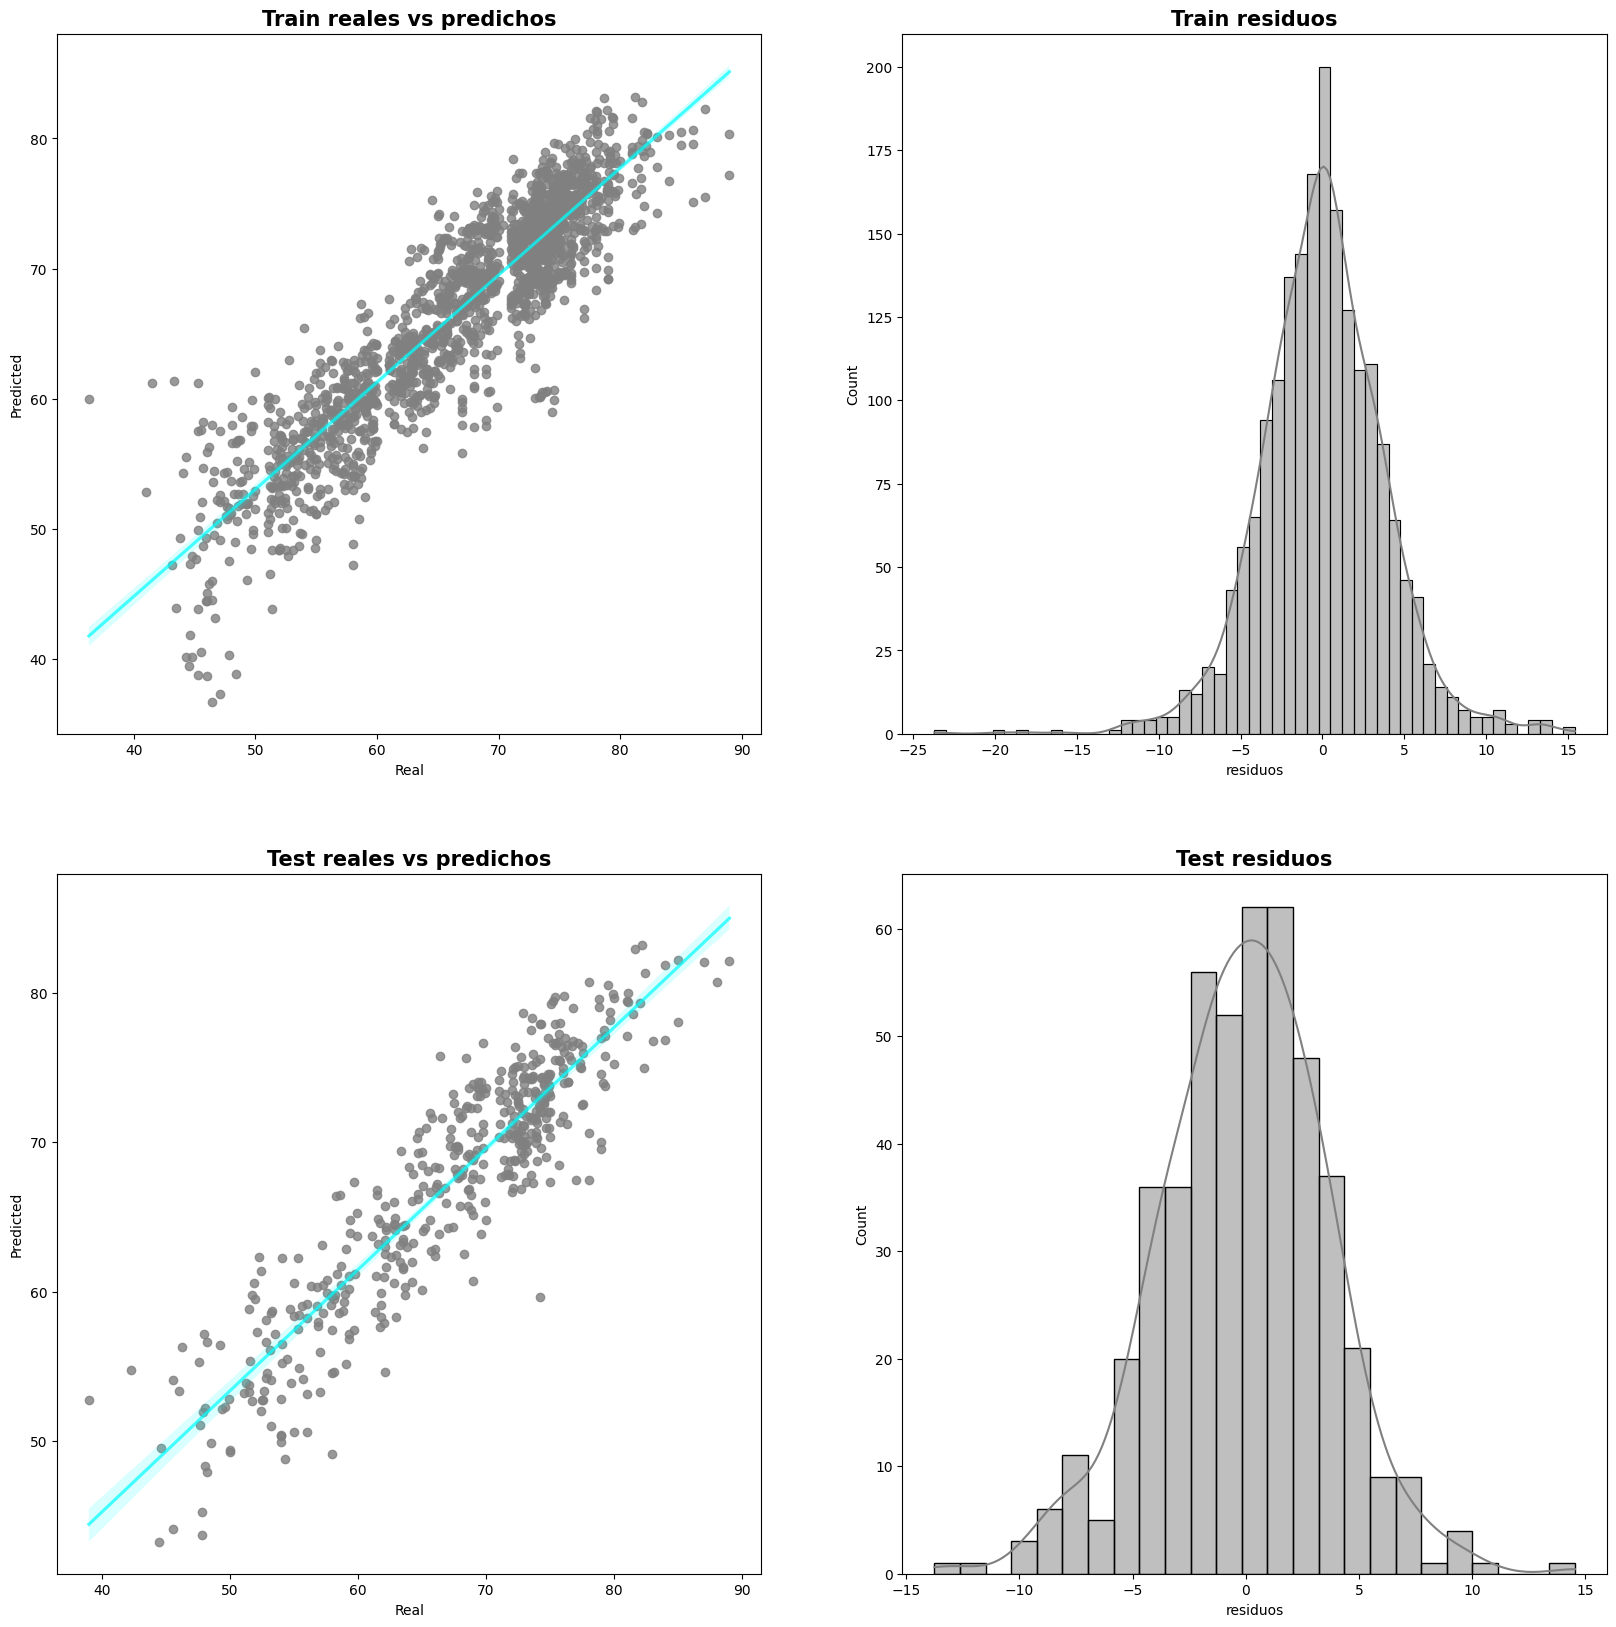

In [31]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados1[resultados1['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "aqua", "alpha": 0.7 })


sns.regplot(data = resultados1[resultados1['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "aqua", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados1[resultados1['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True,
             line_kws= {"color": "aqua"},
             ax = ax[0,1])

 

sns.histplot(resultados1[resultados1['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [32]:
# Para el conjunto de entrenamiento las méticas han sido:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y1_train,y1_predict_train))
print('El MAE es',mean_absolute_error(y1_train,y1_predict_train))
print('El MSE es',mean_squared_error(y1_train,y1_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y1_train,y1_predict_train)))

Para el conjunto train:---------------
El valor de r2 score es  0.8227234932798939
El MAE es 2.822864483066393
El MSE es 14.303049938976704
EL RMSE es  3.7819373261566227


In [33]:
# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y1_test,y1_predict_test))
print('El MAE es',mean_absolute_error(y1_test,y1_predict_test))
print('El MSE es',mean_squared_error(y1_test,y1_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y1_test,y1_predict_test)))

Para el conjunto test:---------------
El valor de r2 score es  0.8370928160768384
El MAE es 2.8866643465788293
El MSE es 13.768914291778573
EL RMSE es  3.710648769659906


In [34]:
resultados_metricas2 = {'MAE': [mean_absolute_error(y1_test, y1_predict_test), mean_absolute_error(y1_train, y1_predict_train)],
                'MSE': [mean_squared_error(y1_test, y1_predict_test), mean_squared_error(y1_train, y1_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y1_test, y1_predict_test)), np.sqrt(mean_squared_error(y1_train, y1_predict_train))],
                'R2':  [r2_score(y1_test, y1_predict_test), r2_score(y1_train, y1_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion Estan", "LinearRegression Estan"]}

df2_resultados = pd.DataFrame(resultados_metricas2)

df2_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,2.886664,13.768914,3.710649,0.837093,test,Linear Regresion Estan
1,2.822864,14.303050,3.781937,0.822723,train,LinearRegression Estan


In [35]:
cv_scores2 = cross_validate(
                estimator = LinearRegression(),
                X         = X1,
                y         = y1,
                scoring   = ('r2', 'neg_root_mean_squared_error','neg_mean_squared_error'),
                cv        = 10)

cv_scores2 = pd.DataFrame(cv_scores2)
cv_scores2

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_squared_error
0,0.010437,0.005558,0.695596,-4.380350,-19.187468
1,0.008672,0.005008,0.857186,-4.226925,-17.866894
2,0.018893,0.006716,0.837140,-3.333356,-11.111263
3,0.007475,0.004478,0.852110,-3.685022,-13.579387
4,0.006227,0.007262,0.698223,-3.654775,-13.357379
5,0.006110,0.008382,0.829087,-3.892493,-15.151501
6,0.008340,0.005833,0.863721,-3.001091,-9.006545
7,0.009668,0.006098,0.666981,-4.941611,-24.419521
8,0.007950,0.007276,0.780882,-3.930038,-15.445198
9,0.008400,0.005480,0.838007,-3.698863,-13.681585


In [36]:
print(f"La media de r2 para 10 iteraciones es {cv_scores2['test_r2'].mean()}.")

La media de r2 para 10 iteraciones es 0.7918933871751626.


In [37]:
print(f"La media de RMSE para 10 iteraciones es {cv_scores2['test_neg_root_mean_squared_error'].mean()}.")

La media de RMSE para 10 iteraciones es -3.874452321156512.


In [38]:
dif_años=(df2['life_expectancy'].max())-df2['life_expectancy'].min()
dif_años

52.7

In [39]:
cv_scores2['test_neg_root_mean_squared_error'].mean()/dif_años

-0.0735190193767839

` Vemos que el R2 nos indica que nuestras variables independientes predicen en un 83% nuestra varible respuesta (para el test) para el caso de regresion lineal clasico, para el caso del metodo cross_validation en 10 interacciones esta media nos arroja un 79%.`

` Al comparar los datos arrojados por el conjunto de entrenamiento con respecto a los devueltos por el test consideramos que no existe overfitting ni underfitting  porque las predicciones se alinean con los datos reales, pero si es verdad que el modelo sea mas correcto podriamos agregar variables predictoras  con el fin de reducir los residuos.`

`Para el caso del indicador RMSE observamos que para el conjunto de test el mismo es de 3.71 años y el de training es 3.78 años lo que implica que la diferencia del error entre lo que entreno y lo que predijo es minima, por lo que entendemos que el modelo arroja un valor adecuado. Al analizar el RMSE vemos que al predecir la expectiva de vida el modelo puede arrojarnos un valor estimado con un rango de error de  entre -3.71 y 3.71 años, es decir un  7%.`





`Podemos sacar de conlcusion que el modelo estandarizado  y el sin estandarizar no presentan diferencias significativas en cunto a los resultados que devuelven, por lo que hemos decidico continuar trabajando con el modelo sin estandarizar.`

---

3. Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [40]:
df2.to_csv('../files/df_sin_estandarizar.csv')
df2_resultados.to_csv('../files/metricas_sin_estandarizar.csv')
df_resultados.to_csv('../files/metricas_estandarizado.csv')
